# Task: build any three classification model.

# Data Description

Organizations spend huge amounts of money to acquire customers. Even before a customer is acquired, you must gain brand and product awareness and customer consideration. This requires lots of effort throughout the sales funnel, using lots of marketing and sales resources. Once a customer is acquired, they should be held on to dearly (at least the ones with high lifetime value). Knowing which customers have a high propensity to churn is critical to targeted retention efforts


 * **1- State:** the US state in which the customer resides, indicated by a two-letter abbreviation.
 
 * **Account Length:** the number of days that this account has been active.
 
 * Area Code: the three-digit area code of the corresponding customer’s phone number.
 
 * Phone: the remaining seven-digit phone number.
 
 *  Int’l Plan: whether the customer has an international calling plan: yes/no.
 
 *   VMail Plan: whether the customer has a voice mail feature: yes/no.
 
 * VMail Message: presumably the average number of voice mail messages per month.
 
 * Day Mins: the total number of calling minutes used during the day.
 
 *  Day Calls: the total number of calls placed during the day.
 
 * Day Charge: the billed cost of daytime calls.
 
 * Eve Mins: the total number of calling minutes used during the evening.
 
 * Eve Calls: the total number of calls placed during the evening

 *  Eve Charge: the billed cost of evening time calls.
 
 * Night Mins: the total number of calling minutes used during the night.
 
 * Night Calls: the total number of calls placed during the night.
 
 * Night Charge: the billed cost of nighttime calls.
 
 * Intl Mins: the total number of international minutes.
 
 *  Intl Calls: the total number of international calls.
 
 * Intl Charge: the billed cost for international calls.
 
 * CustServ Calls: the number of calls placed to Customer Service.
 
 * Churn?: whether the customer left the service: 0-no-churn/1-churn.

 



In [3]:
#-----------------------Regular Imports---------------------------------------------#
import numpy as np                    # To work with arrays to perform mathematical operations
import pandas as pd                   # TO work with Dataframes
import seaborn as sns                 # An advanced visualization library built on top of matplotlib
import matplotlib.pyplot as plt       # Library used for visualization

#---------------------For importing the data from S3 Bucket------------------------#
# Boto3 is the Amazon Web Services (AWS) Software Development Kit (SDK) for Python
# Boto3 allows Python developer to write software that makes use of services like Amazon S3 and Amazon EC2
# Boto3 makes it easy to integrate Python application, library, or script 
# with AWS services including Amazon S3, Amazon EC2, Amazon DynamoDB, and more.
import boto3

#---------------------Model preprocessing------------------------------------------
from sklearn.preprocessing import StandardScaler      # For standardizing the numric data
from sklearn.model_selection import train_test_split  # For splitting the dataset into train and test

#------------------------Imbalance data handling------------------------------------------------
from imblearn.over_sampling import RandomOverSampler  # importing the SMOTE 
from collections import Counter                       # importing the counter function to check the class 

#---------------------Importing the models---------------------------------------------------------
from sklearn.ensemble import RandomForestClassifier    # Importing the Random Forest classifier
from xgboost import XGBClassifier                      # Importing the XGboost Classifier
from sklearn.linear_model import LogisticRegression    # Importing the Logistic Regression
from sklearn.neighbors import KNeighborsClassifier     # Importing the module for K Nearest Neighbor classifier
from sklearn.naive_bayes import GaussianNB             # Importing the Gaussian Naive Bayes
from sklearn.calibration import CalibratedClassifierCV # This class uses cross-validation to both estimate the parameters of a classifier and subsequently calibrate a classifier.
from sklearn.svm import LinearSVC                      # For importing linear SVC 

#----------------------Model Selection--------------------------------------------------------------
from sklearn.model_selection import RandomizedSearchCV # Using the Randomized Search CV to find the best hyper-parameters
from sklearn.model_selection import StratifiedKFold    # For using Stratified method of Cross calidation 

#---------------------Evaluation Metric------------------------------------------------------------
from sklearn.metrics import classification_report, confusion_matrix,matthews_corrcoef

%matplotlib inline                     # Used for printing the plots below the celll itself

In [4]:
# importing the datset using pandas
telecom_df = pd.read_csv("telecom_churn.csv") # Body is the key word
telecom_df

,state,account_length,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,class
0,16,128,415,2845,0,1,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,35,107,415,2301,0,1,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,31,137,415,1616,0,0,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,35,84,408,2510,1,0,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,36,75,415,155,1,0,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,11,50,408,2000,0,1,40,235.7,127,40.07,...,126,18.96,297.5,116,13.39,9.9,5,2.67,2,0
4996,49,152,415,394,0,0,0,184.2,90,31.31,...,73,21.83,213.6,113,9.61,14.7,2,3.97,3,1
4997,7,61,415,313,0,0,0,140.6,89,23.90,...,128,14.69,212.4,97,9.56,13.6,4,3.67,1,0
4998,7,109,510,3471,0,0,0,188.8,67,32.10,...,92,14.59,224.4,89,10.10,8.5,6,2.30,0,0


In [5]:
telecom_df.shape # checking the shape of the data

(5000, 21)

In [6]:
telecom_df.columns # checkinh the features

Index(['state', 'account_length', 'area_code', 'phone_number',
       'international_plan', 'voice_mail_plan', 'number_vmail_messages',
       'total_day_minutes', 'total_day_calls', 'total_day_charge',
       'total_eve_minutes', 'total_eve_calls', 'total_eve_charge',
       'total_night_minutes', 'total_night_calls', 'total_night_charge',
       'total_intl_minutes', 'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'class'],
      dtype='object')

In [7]:
telecom_df['number_customer_service_calls'].nunique()

10

In [8]:
telecom_df.dtypes # obtain the summaty of tyhe daaframe data types

state                              int64
account_length                     int64
area_code                          int64
phone_number                       int64
international_plan                 int64
voice_mail_plan                    int64
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
class                              int64
dtype: object

# Data visualization

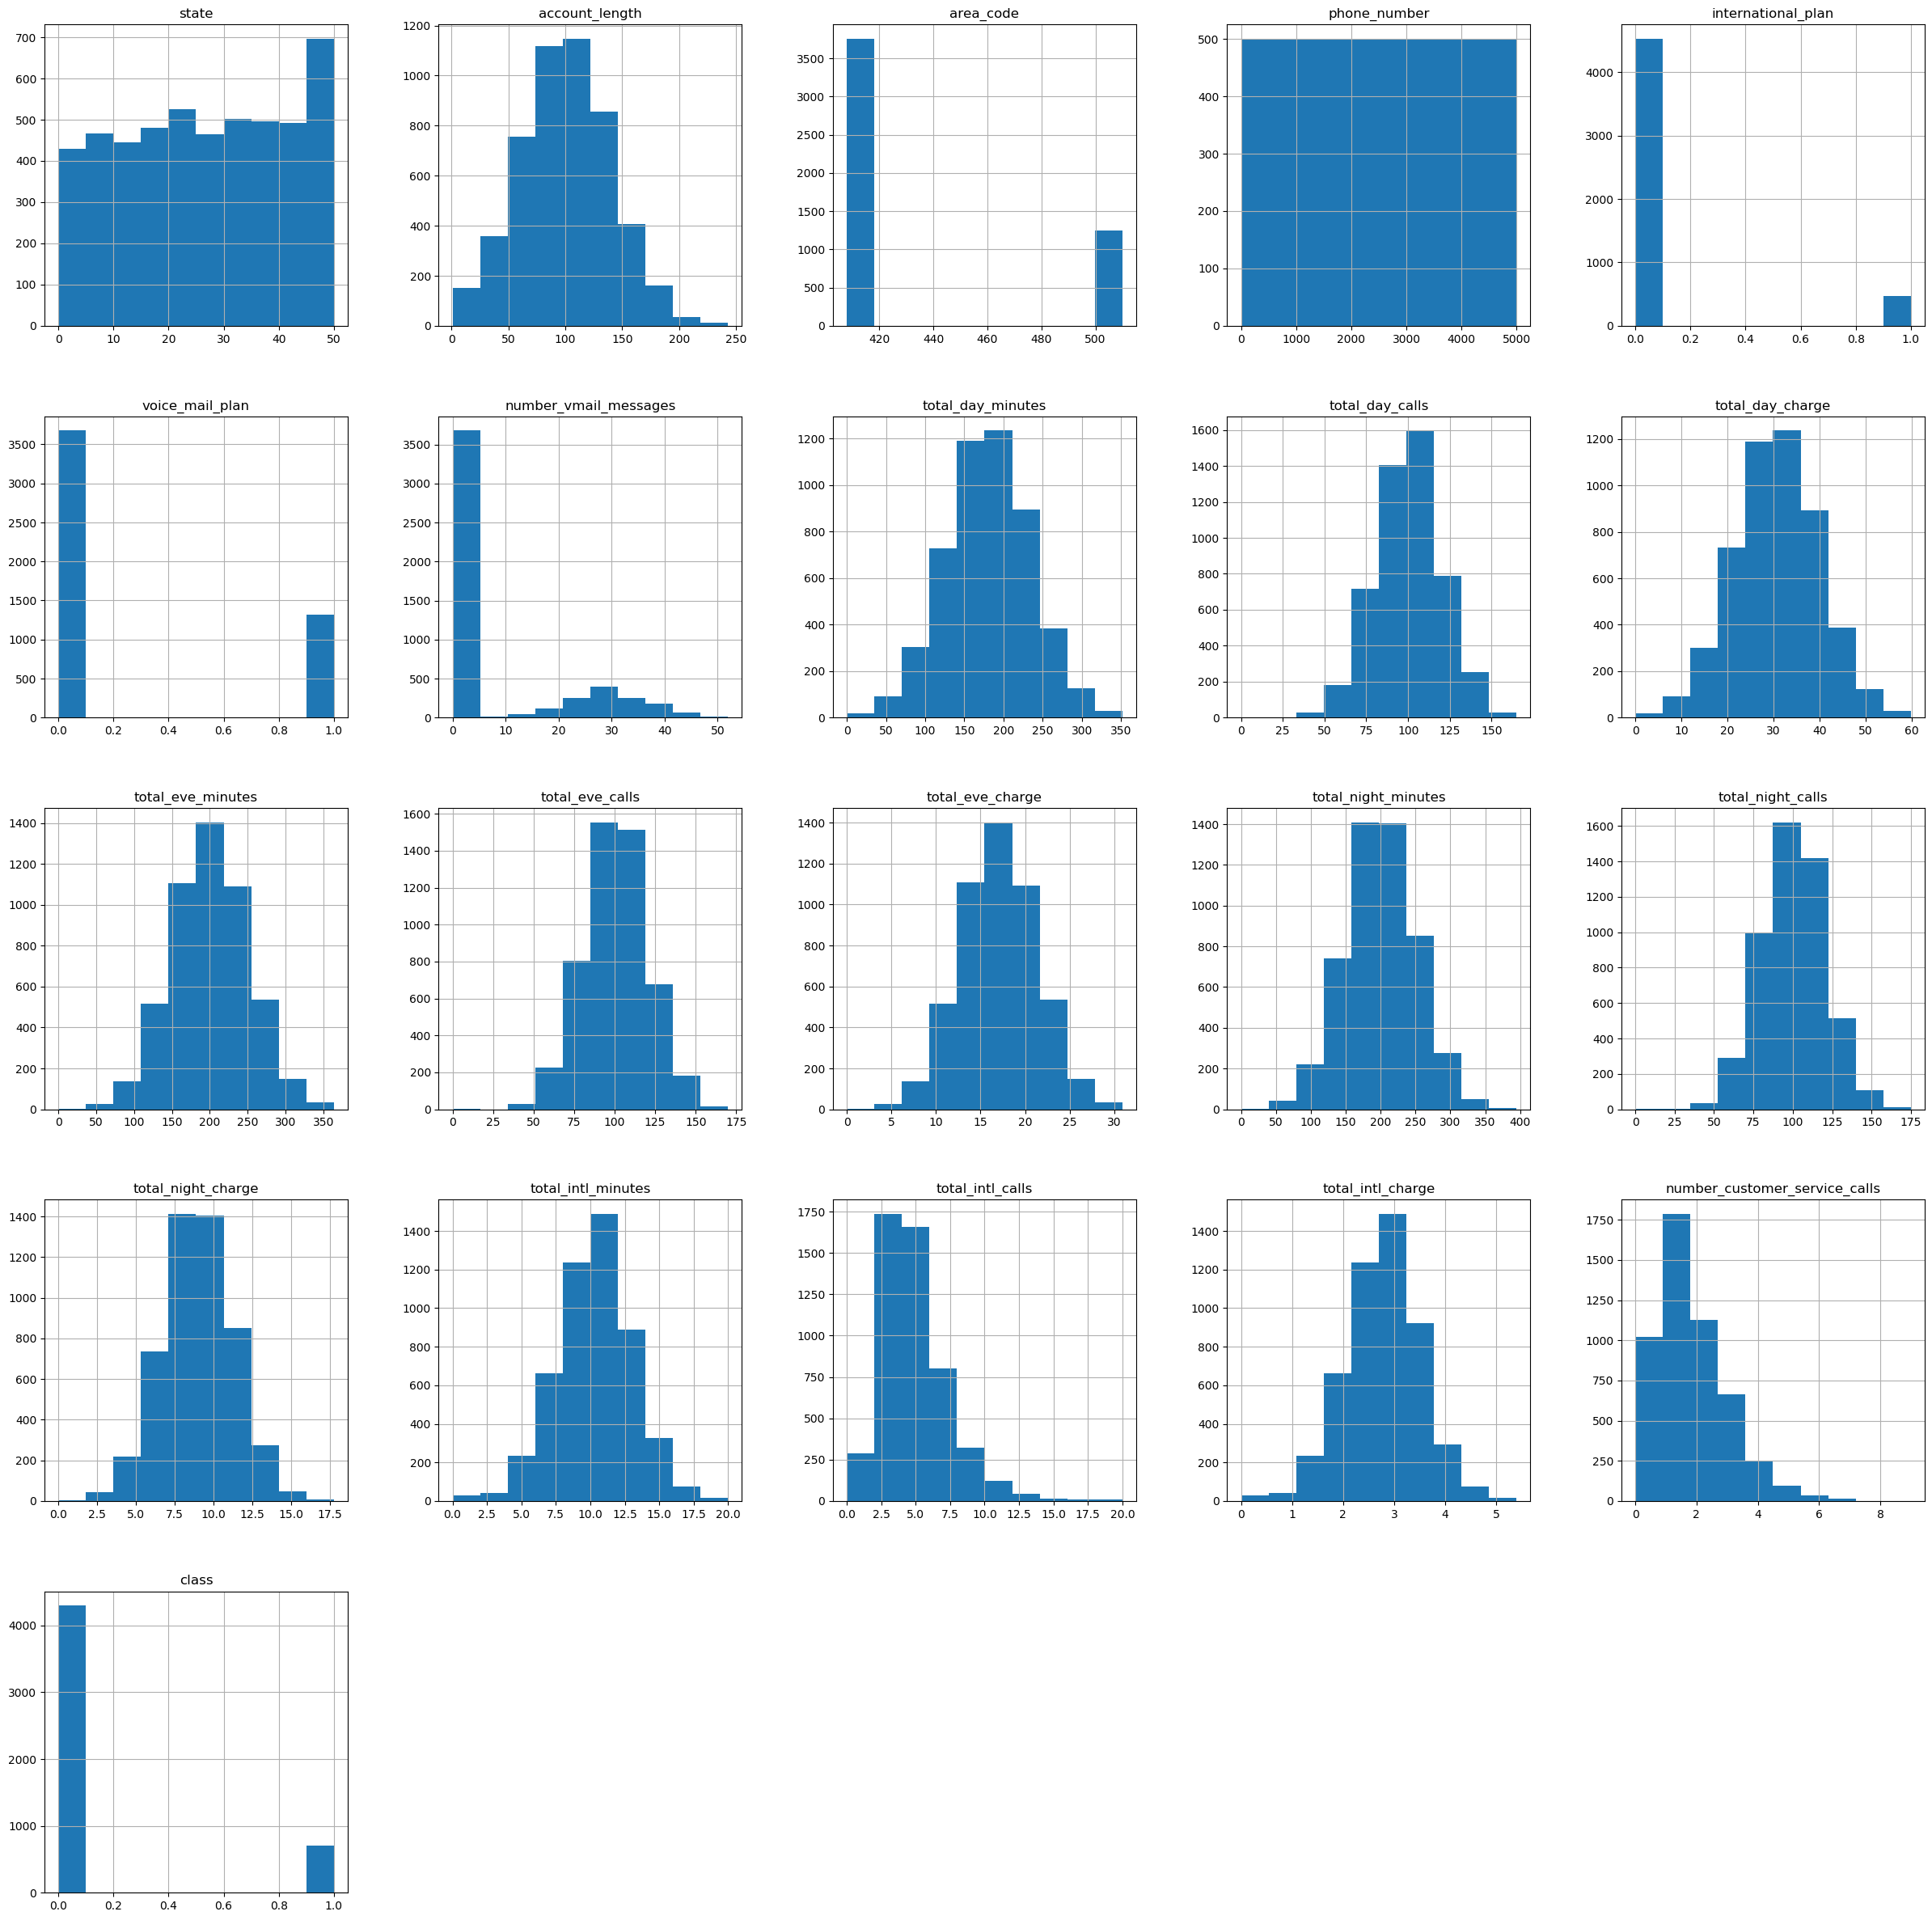

In [9]:
# plotting the histogram
telecom_df.hist(figsize = (30,30))
plt.show()

In [10]:
telecom_df['class'].value_counts() # check the target varible

0    4293
1     707
Name: class, dtype: int64

  * The data was highly imbalanced; the not-churn rate (4293) is much higher than the churn rate (707). Naturally, this type of churn occurs because you will not have the same level of churn. If there is that much churn, the company will go out of business. As a result, in the following analysis, we will employ some sampling techniques to increase the minority class. 
 
 

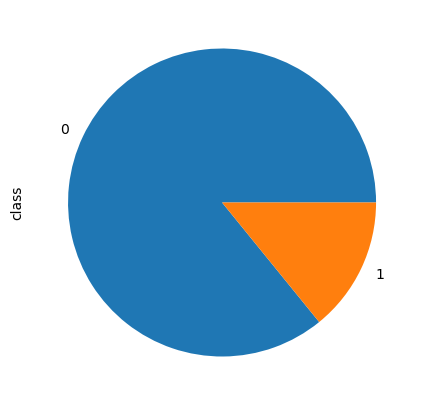

In [11]:
# plotting the bar chart to see the categories
plt.figure(figsize = [5,5])
telecom_df['class'].value_counts().plot(kind = 'pie')

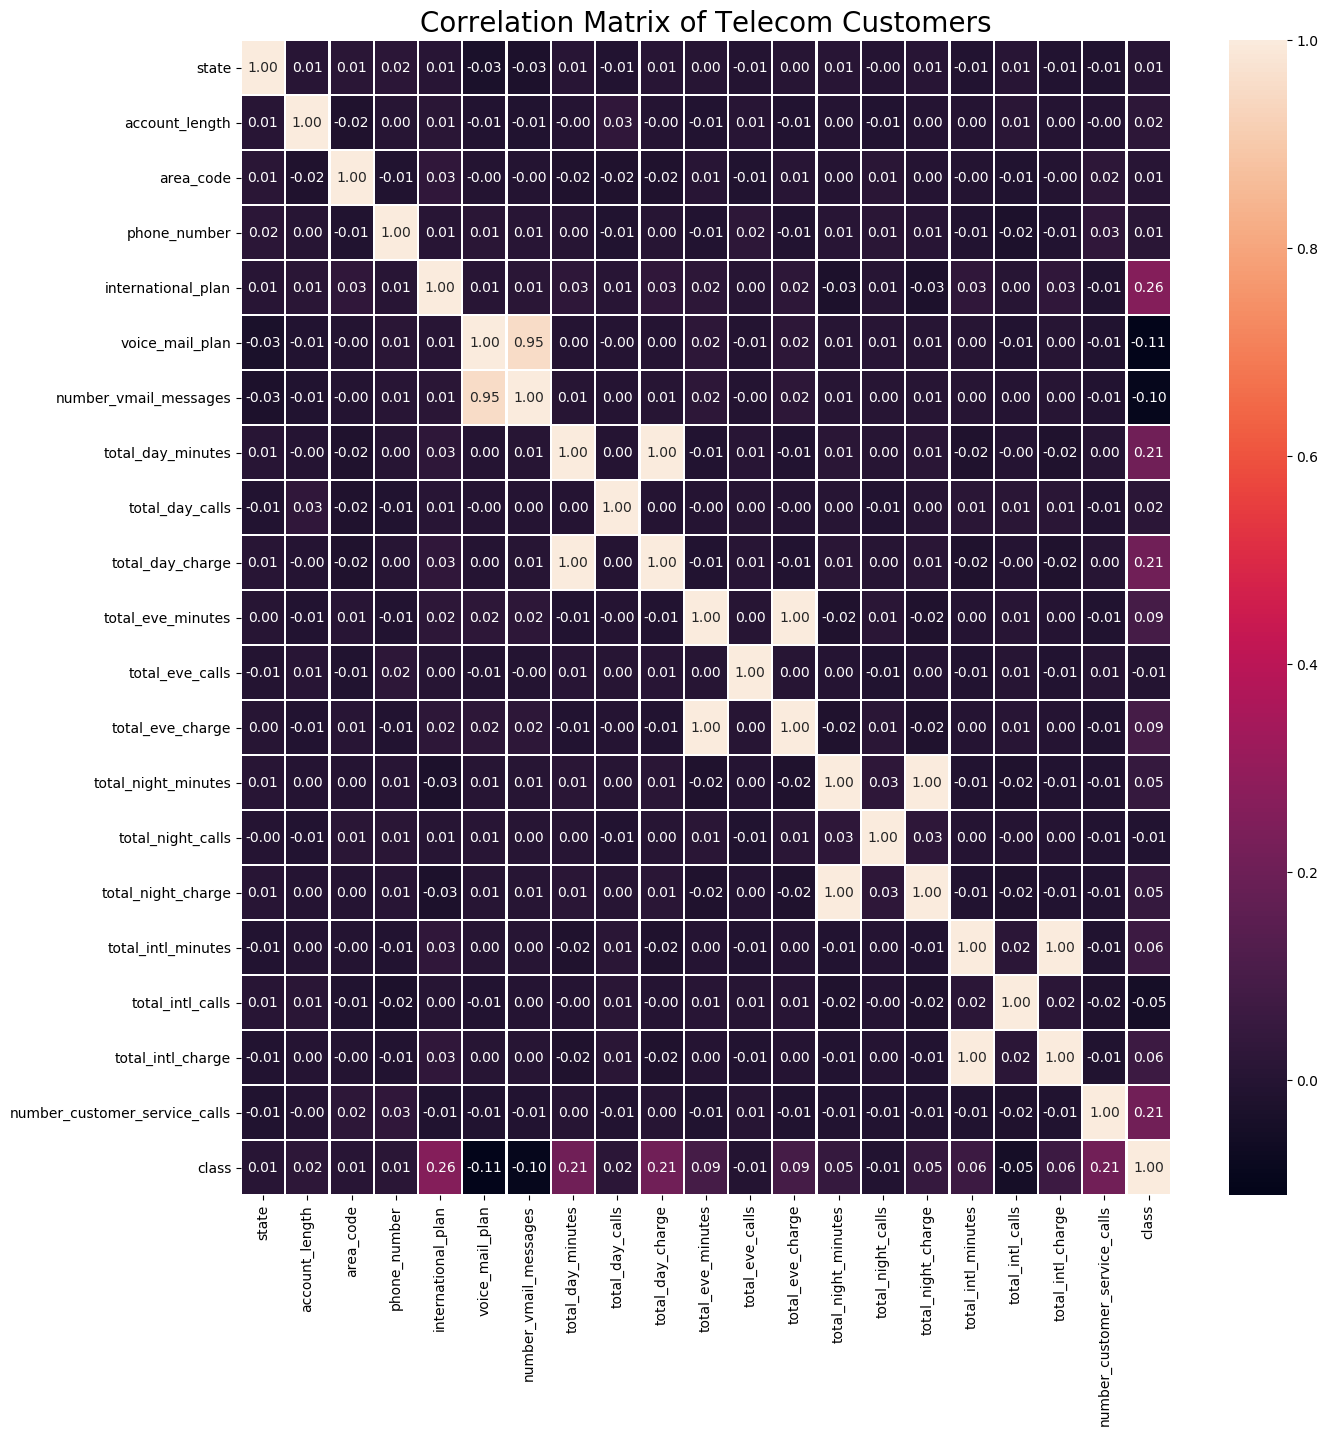

In [12]:
# Correleation plot
corr_matrix = telecom_df.corr()
plt.figure(figsize = (15, 15))
cm = sns.heatmap(corr_matrix,
               linewidths = 1,
               annot = True,
               fmt = ".2f")
plt.title("Correlation Matrix of Telecom Customers", fontsize = 20)
plt.show()

 * It is clearly shown that "voice_mail_plan" and "number_vmail_message" are highly correlated.
 
 * Several of the numerical data are very correlated. (Total day minutes and Total day charge), (Total eve minutes and Total eve charge), (Total night minutes and Total night charge) and lastly (Total intl minutes and Total intl charge) are alo correlated.

Text(0.5, 1.0, 'Distribution of day charges by churn')

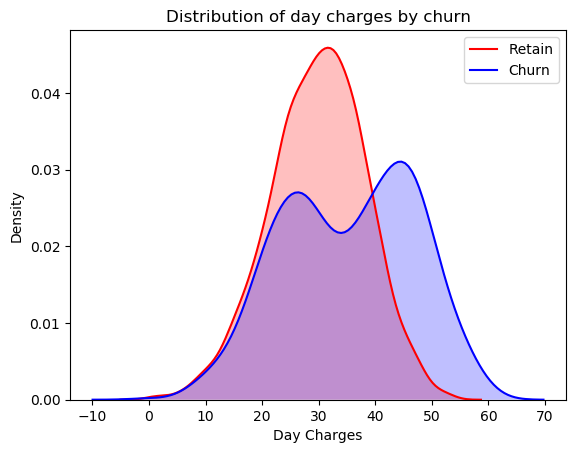

In [13]:
# Churn by day charges (totla day charge)
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df['class'] == 0)],
                 color = 'red', shade = True)
ax = sns.kdeplot(telecom_df.total_day_charge[(telecom_df['class'] == 1)],
                 color = 'Blue', shade = True)
ax.legend(["Retain", "Churn"], loc = "upper right")
ax.set_ylabel("Density")
ax.set_xlabel("Day Charges")
ax.set_title("Distribution of day charges by churn")

 * In this data set, the total day call charge "Retain" is normally distributed. Customers who pay between cents 20 and cents 40 per day are still retained in this segment
 

# Identify Feature importance & Prepare the data before model training


In [95]:
# Unnecessary features would decrease the training speed, the model interpretability and the 
# Generalization performance on the test data.
# Therefore, finding and selecting the most useful features in the dataset is crucial.
# Assigining input featrues to x and target (vchurn) to y. 
X = telecom_df.drop(['class','state','area_code','phone_number'],axis = "columns") 
y = telecom_df["class"]

In [96]:
X.shape # shape of the "x"

(5000, 17)

In [97]:
y.shape # shape of the "y"

(5000,)

In [98]:
# Perform train/test split
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 101)


In [99]:
X_train.shape # check the x_train shape 

(3750, 17)

In [100]:
X_test.shape # check the x_test shape 

(1250, 17)

In [101]:
y_train.shape # check the y_train

(3750,)

In [102]:
y_train.values#.ravel()

array([0, 0, 0, ..., 0, 0, 1])

In [103]:
X_train

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
3430,57,0,0,0,165.1,91,28.07,240.8,56,20.47,277.0,100,12.47,9.5,3,2.57,2
3979,33,0,1,16,125.1,56,21.27,246.6,140,20.96,235.4,109,10.59,12.1,2,3.27,0
2153,89,0,0,0,89.7,80,15.25,179.8,81,15.28,145.7,120,6.56,9.5,4,2.57,2
4764,96,0,0,0,178.0,140,30.26,294.6,125,25.04,242.2,91,10.90,12.0,6,3.24,2
36,36,0,1,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4171,36,1,1,19,171.9,96,29.22,198.4,111,16.86,321.7,76,14.48,10.5,1,2.84,1
599,75,0,1,46,214.1,62,36.40,200.9,111,17.08,246.8,126,11.11,9.2,6,2.48,0
1361,64,0,0,0,206.2,76,35.05,232.4,76,19.75,251.6,96,11.32,13.6,2,3.67,1
1547,159,0,0,0,87.7,103,14.91,278.2,97,23.65,170.6,93,7.68,10.5,10,2.84,1


# Scale the numerical variable based on the data. (x_train, x_test)

In [105]:
X_train = pd.concat([X_train.iloc[:,1:],X_train.iloc[:,0]],axis = 1) # Rearranging the order of the columns

In [106]:
scaler = StandardScaler() # Creating a class

In [107]:
X_train.head()

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,account_length
3430,0,0,0,165.1,91,28.07,240.8,56,20.47,277.0,100,12.47,9.5,3,2.57,2,57
3979,0,1,16,125.1,56,21.27,246.6,140,20.96,235.4,109,10.59,12.1,2,3.27,0,33
2153,0,0,0,89.7,80,15.25,179.8,81,15.28,145.7,120,6.56,9.5,4,2.57,2,89
4764,0,0,0,178.0,140,30.26,294.6,125,25.04,242.2,91,10.90,12.0,6,3.24,2,96
36,0,1,30,146.3,128,24.87,162.5,80,13.81,129.3,109,5.82,14.5,6,3.92,0,36


In [108]:
scaler.fit(X_train.iloc[:,2:])  # Fitting on the train data alone

StandardScaler()

In [109]:
X_train.iloc[:,2:] = scaler.transform(X_train.iloc[:,2:]) # Then Transforming

In [110]:
X_train  # checking the x_train shape of the data

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,account_length
3430,0,0,-0.577601,-0.290829,-0.447635,-0.290563,0.789257,-2.230947,0.789677,1.523399,0.020603,1.525567,-0.271075,-0.587089,-0.265083,0.328168,-1.085209
3979,0,1,0.600135,-1.034110,-2.204837,-1.033848,0.904328,2.009450,0.904047,0.698040,0.472722,0.696676,0.671736,-0.988838,0.675132,-1.202466,-1.691050
2153,0,0,-0.577601,-1.691915,-0.999898,-1.691874,-0.420972,-0.968924,-0.421714,-1.081639,1.025313,-1.080148,-0.271075,-0.185340,-0.265083,0.328168,-0.277421
4764,0,0,-0.577601,-0.051120,2.012449,-0.051181,1.856639,1.252236,1.856355,0.832955,-0.431516,0.833355,0.635474,0.618158,0.634837,0.328168,-0.100718
36,0,1,1.630654,-0.640171,1.409979,-0.640344,-0.764201,-1.019405,-0.764825,-1.407021,0.472722,-1.406413,1.542024,0.618158,1.548189,-1.202466,-1.615320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4171,1,1,0.820961,-0.164471,-0.196606,-0.164860,-0.051952,0.545504,-0.052928,2.410263,-1.185048,2.411774,0.091545,-1.390587,0.097571,-0.437149,-1.615320
599,0,1,2.808390,0.619691,-1.903603,0.619962,-0.002352,0.545504,-0.001578,0.924220,1.326725,0.925944,-0.379861,0.618158,-0.385968,-1.202466,-0.630828
1361,0,0,-0.577601,0.472893,-1.200722,0.472398,0.622602,-1.221329,0.621623,1.019454,-0.180339,1.018533,1.215666,-0.988838,1.212398,-0.437149,-0.908505
1547,0,0,-0.577601,-1.729079,0.154835,-1.729038,1.531266,-0.161229,1.531917,-0.587615,-0.331045,-0.586341,0.091545,2.225153,0.097571,-0.437149,1.489614


In [111]:
X_test = pd.concat([X_test.iloc[:,1:],X_test.iloc[:,0]],axis = 1) # Rearranging the order of the columns

In [112]:
X_test.iloc[:,2:] = scaler.transform(X_test.iloc[:,2:]) # Here, only transformation is performed

In [113]:
X_test

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,account_length
1718,1,0,-0.577601,1.628696,-0.748870,1.628863,-1.000295,1.555122,-1.000568,1.938062,-0.783164,1.940012,-0.198551,1.421655,-0.197925,0.328168,0.227446
2511,0,0,-0.577601,-0.623447,0.757304,-0.623948,-0.776105,1.151275,-0.776495,-1.153065,0.171310,-1.155101,-1.105101,0.618158,-1.111277,1.093485,1.742048
345,0,0,-0.577601,1.476323,1.560597,1.475833,-0.432876,0.999832,-0.433385,-1.293931,0.975077,-1.291780,-1.105101,1.421655,-1.111277,1.093485,1.035234
2521,0,0,-0.577601,0.653139,-1.200722,0.652754,-1.103462,0.898870,-1.103268,-0.264217,1.477432,-0.264484,0.671736,-0.185340,0.675132,-0.437149,0.934260
54,0,0,-0.577601,-0.552836,-0.849281,-0.552899,0.370636,0.797908,0.369541,0.073069,1.376961,0.075008,-0.198551,-0.587089,-0.197925,2.624118,-0.327908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1881,0,0,-0.577601,1.708599,-0.146400,1.708657,0.701961,-0.262191,0.700982,0.700024,0.271781,0.701085,-0.923791,-0.988838,-0.923234,-1.202466,-0.605585
2800,1,0,-0.577601,1.312801,0.907921,1.312966,-0.087663,-1.019405,-0.087940,-0.163031,-2.340464,-0.163077,0.272855,-0.988838,0.272183,-1.202466,-1.211426
1216,0,0,-0.577601,-0.736798,-0.799075,-0.736534,0.205966,0.394061,0.206155,-1.914934,1.376961,-1.913448,-1.576507,0.618158,-1.581385,1.093485,-0.125961
1648,0,0,-0.577601,-0.116158,-1.050104,-0.115672,0.709897,1.807526,0.710318,1.392452,0.522958,1.393297,-0.633695,0.216409,-0.627738,-1.202466,0.050743


In [114]:
X_test.shape # checking the shape of the data.

(1250, 17)

# To handle the imbalance data:
    
 * Synthetic Minority Oversampling Technique (SMOTE)
    
 * Randomly pick a point from the minority class.


In [115]:
#!pip install imblearn

In [117]:
#before creating the synthetic data, the size of the labels
Counter(y_train)

Counter({0: 3211, 1: 539})

In [118]:
os=RandomOverSampler(0.80) # To balance the data, we are synthetic 80 percent of it from the minority population. 
os

/opt/conda/lib/python3.7/site-packages/imblearn/utils/_validation.py:590: FutureWarning: Pass sampling_strategy=0.8 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


RandomOverSampler(sampling_strategy=0.8)

In [119]:
X_train_re,y_train_re = os.fit_resample(X_train,y_train)             # creating the new data for x_train and y_train
print("The number of classes before fit {}".format(Counter(y_train)))  # class size before applying the synthetic method 
print("The number of classes after fit {}". format(Counter(y_train_re))) # class ize after applying the synthetic method

The number of classes before fit Counter({0: 3211, 1: 539})
The number of classes after fit Counter({0: 3211, 1: 2568})


In [120]:
from sklearn.ensemble import RandomForestClassifier # importing the random forest calssifier
rf = RandomForestClassifier()                      # creatinf the instance
rf.fit(X_train_re,y_train_re.values.ravel())      # fitting the model

RandomForestClassifier()

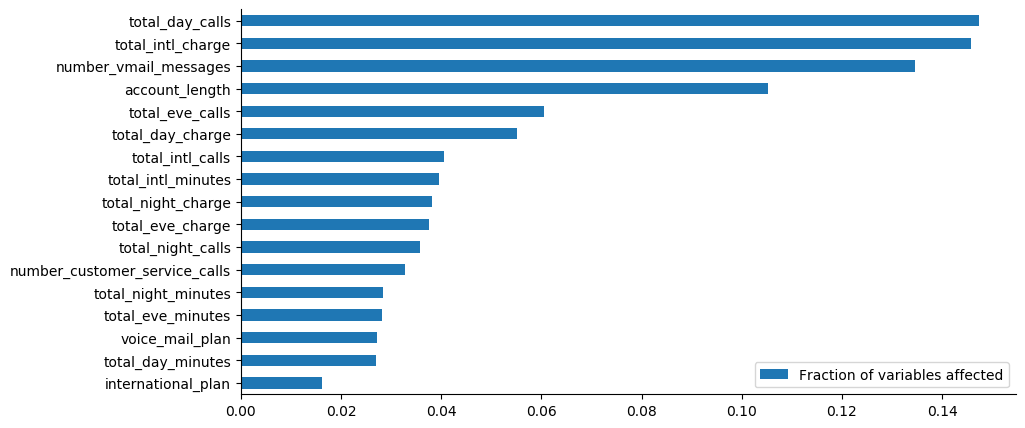

In [121]:
# plotting the important featrues
feat_scores= pd.DataFrame({"Fraction of variables affected" : rf.feature_importances_},index = X.columns)
feat_scores= feat_scores.sort_values(by = "Fraction of variables affected")
feat_scores.plot(kind = "barh", figsize = (10, 5))
sns.despine()

 * Using the random forest model, we find important features such as "to_day_calls"total_day_charge" and number_vmail_message.

# Building The Models
Here since predicting the 1s correctly is our concern we would focus majorly on two model Evaluation Metric 'Recall' (As it gives more importance to False Negative), 'F1 Score' (A good Matrix which gives equal importance to precision as well as recall) and 'Mathew Correlation Coefficient' (Used in case of imbalanced Data).

# **Model-1:** Logistic regression

* Solver Options in glm:
    
* "linlinear": Library for Large Linear Classification. Uses a coordinate descent algorithm. Coordinate descent is based on minimizing a multivariate function by solving univariate optimization problems in a loop. In other words, it moves toward the minimum in one direction at a time. It is the default solver for Scikit-learn versions earlier than 0.22.0. It performs pretty well with high dimensionality. It does have a number of drawbacks. It can get stuck, is unable to run in parallel, and can only solve multi-class logistic regression with one-vs.-rest.
    
What is the meaning of C parameter in sklearn.linear_model.LogisticRegression? How does it affect the decision boundary? Do high values of C make the decision boundary non-linear?
    
* C is known as a "hyperparameter." The parameters are numbers that tell the model what to do with the characteristics, whereas the hyperparameters instruct the model on how to choose parameters.
*  Regularization will penalize the extreme parameters, the extreme values in the training data leads to overfitting.
* A high value of C tells the model to give more weight to the training data. A lower value of C will indicate the model to give complexity more weight at the cost of fitting the data. Thus, a high Hyper Parameter value C indicates that training data is more important and reflects the real world data, whereas low value is just the opposite of this.

In [123]:
glm = LogisticRegression(penalty = 'l1',solver = 'liblinear',C = 0.3)  # creating the instance

In [124]:
glm.fit(X_train_re,y_train_re.values.ravel())  # fitting the model

LogisticRegression(C=0.3, penalty='l1', solver='liblinear')

In [125]:
pred_glm = glm.predict(X_test)  # predicting the unseen data

In [127]:
print(classification_report(y_test,pred_glm))

              precision    recall  f1-score   support

           0       0.93      0.81      0.87      1082
           1       0.34      0.64      0.44       168

    accuracy                           0.78      1250
   macro avg       0.64      0.72      0.65      1250
weighted avg       0.85      0.78      0.81      1250



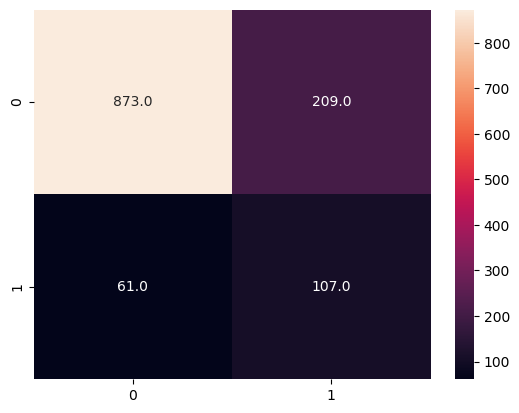

In [128]:
sns.heatmap(confusion_matrix(y_test,pred_glm), annot = True, fmt=".1f") # confusion matrix
plt.show()

In [129]:
matthews_corrcoef(y_test,pred_glm) # Computing the Mathew Correlation coeffecient

0.34824407442590527

* There was a high degree of imbalance in this data set, based on the F1-score and MCC, we can conclude that GLM did not perform well in this data due to multicollinearity issues.

# **Model-2**: SVM

In [131]:
model_svcv = LinearSVC(max_iter = 1000000, C = 0.4) # Creating a class instance
model_svm = CalibratedClassifierCV(model_svcv,cv =5)          # Calibrated Classifier CV uses Cross validation to estimate the parameters
model_svm.fit(X_train_re,y_train_re)                          # Fitting the model

CalibratedClassifierCV(base_estimator=LinearSVC(C=0.4, max_iter=1000000), cv=5)

In [132]:
y_predict_svm = model_svm.predict(X_test) # prdicting the y_test data

In [133]:
print(classification_report(y_test,y_predict_svm)) # Evaluate the model.

              precision    recall  f1-score   support

           0       0.94      0.81      0.87      1082
           1       0.34      0.64      0.45       168

    accuracy                           0.79      1250
   macro avg       0.64      0.73      0.66      1250
weighted avg       0.86      0.79      0.81      1250



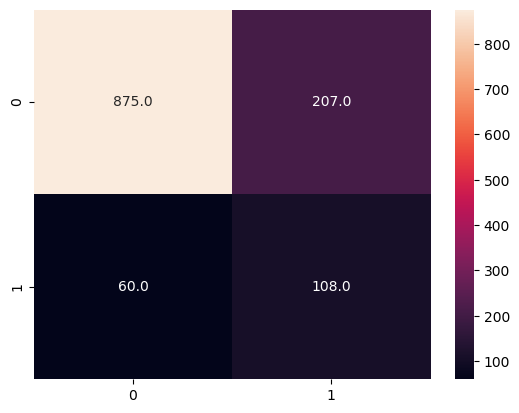

In [134]:
sns.heatmap(confusion_matrix(y_test,y_predict_svm), annot = True,fmt=".1f") # Confusion matrix
plt.show()

In [135]:
matthews_corrcoef(y_test,y_predict_svm) # Computing the Mathew Correlation coeffecient

0.35473822954932777

* When the Glm and svm are compared, the F1-score and MCC are the same, but there is a small difference in "recall."

* Our goal is to predict 1s as accurately as possible, which means we must reduce false positives.When the "glm" and "svm" are compared in the FN point of view, the "FN" in the svm increases slightly.

* However, SVM is still underperforming for this data, so we will build some models in the future.

# Model 3: Random Forest Classifier

In [137]:
rf_model = RandomForestClassifier(random_state =101)                 # Creating an instance of the model
rv = StratifiedKFold(n_splits=5, shuffle=False, random_state=None)   # Applying stratified Cross Validation

parameters = {'max_depth' : [6,7,9,20,None],'max_features' : ['sqrt','log2',None]} # hyperparameter to tuneing

clf = RandomizedSearchCV(rf_model, parameters, random_state=101, cv = rv,scoring = 'recall',n_jobs = -1) # Finally using a randomized Grid search to find the best hyperparameters

search = clf.fit(X_train_re,y_train_re)  # Fiting the model

In [140]:
search.best_params_           # It provides the best hyperparameters

{'max_features': 'log2', 'max_depth': None}

In [141]:
y_test_pred_rf = search.best_estimator_.predict(X_test) # Using our best hyperparameters, we predict the the X_test

In [142]:
print(classification_report(y_test,y_test_pred_rf)) # printing the classification report

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1082
           1       0.89      0.77      0.83       168

    accuracy                           0.96      1250
   macro avg       0.93      0.88      0.90      1250
weighted avg       0.96      0.96      0.96      1250



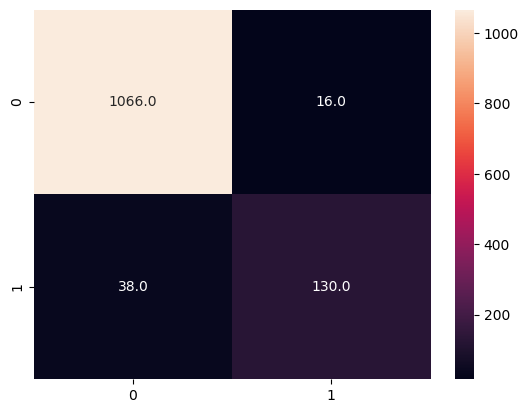

In [143]:
sns.heatmap(confusion_matrix(y_test,y_test_pred_rf) , annot = True,fmt=".1f") # Confusion matrix
plt.show()

In [144]:
matthews_corrcoef(y_test,y_test_pred_rf) 

0.8060495203879147

* Based on the f1-score and Mathew correlation coefficient, we can see that the radom forest is performing well for this data.

# Model 4: K Neighbors Classifier

In [146]:
model =  KNeighborsClassifier()      # Creating a instance of the class

In [147]:
model.fit(X_train_re,y_train_re.values.ravel()) # Fiting the model

KNeighborsClassifier()

In [148]:
pred_knn = model.predict(X_test) # Predicting the X_test

In [149]:
print(classification_report(y_test,pred_knn)) # Classification report

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      1082
           1       0.38      0.64      0.48       168

    accuracy                           0.81      1250
   macro avg       0.66      0.74      0.68      1250
weighted avg       0.86      0.81      0.83      1250



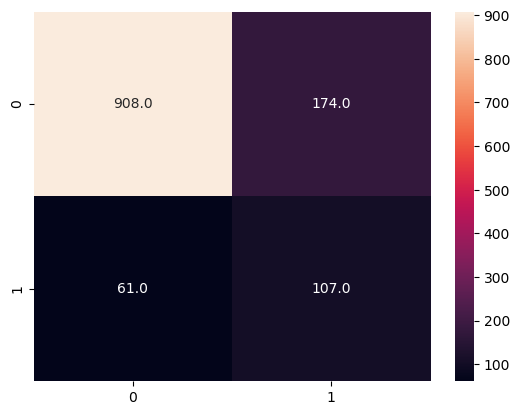

In [150]:
sns.heatmap(confusion_matrix(y_test,pred_knn) , annot = True,fmt=".1f") # Confusion matrix
plt.show()

In [151]:
matthews_corrcoef(y_test,pred_knn) 

0.38899463166536685

* K-Nearest Neighbor performed poorly for this data as well.

# Model-5: Naive Bayes 

In [153]:
model.fit(X_train_re,y_train_re.values.ravel())   # Fitting the model

GaussianNB()

In [154]:
pred_NB = model.predict(X_test)                # Predicting using the model

In [155]:
print(classification_report(y_test,pred_NB))  # Printing the classfication report

              precision    recall  f1-score   support

           0       0.95      0.83      0.89      1082
           1       0.40      0.72      0.52       168

    accuracy                           0.82      1250
   macro avg       0.68      0.78      0.70      1250
weighted avg       0.88      0.82      0.84      1250



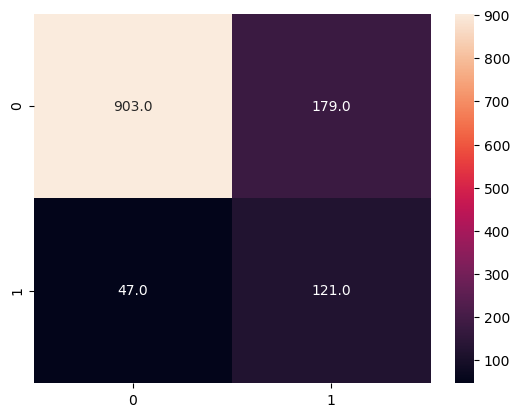

In [156]:
sns.heatmap(confusion_matrix(y_test,pred_NB) , annot = True,fmt=".1f") # Confusion matrix
plt.show()

In [157]:
matthews_corrcoef(y_test,pred_NB) 

0.44308311605326

* A naive Bayesian classifier performed poorly for this data as well.

# Model-6: XGBoost Classifier Model Building 

In [ ]:
#pip install xgboost

In [173]:
classifier = XGBClassifier()
classifier.fit(X_train_re,y_train_re)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [174]:
y_pred_XG = classifier.predict(X_test)

In [175]:
print(classification_report(y_test,y_pred_XG ))  # Printing the classfication report

              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1082
           1       0.86      0.79      0.83       168

    accuracy                           0.96      1250
   macro avg       0.92      0.89      0.90      1250
weighted avg       0.95      0.96      0.95      1250



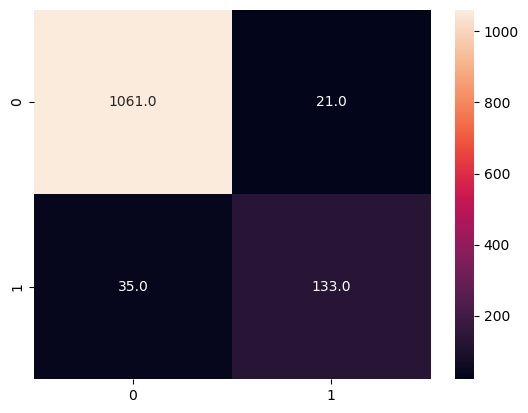

In [176]:
sns.heatmap(confusion_matrix(y_test,y_pred_XG) , annot = True,fmt=".1f") # Confusion matrix
plt.show()

In [177]:
matthews_corrcoef(y_test,y_pred_XG) 

0.8014291631188994

# verdict:

* In this project, we build six classification models to predict whether the "churn" or not-chrun.

*  based on metrics such as F1-score, recall, and Matthews' correlation coefficient we could say GLM, SVM, KNN, and naive Bayesian classifiers perform poorly for this data to predict "churn" compared to the other models, random forest and XGBoost classifiers. 

* Both random forest and XGBoost classifiers are performing well for this data. So, in this case, we want to reduce the "false negative" so in that point view we can conclude that the XGBoost classifier predicts churn (1's) better than the random forest classifier. As a result, XGBoost performed admirably with this data.